# Competition for glucose, with internal goods X and Y, and social objective (model), Time-step growth model

##Here, the case is cell type3 existing regulation to cell type2. Only not receive the regulation from cell type2.

In [1]:
import cobra
import pandas as pd
import numpy as np
import pickle
from cobra.flux_analysis import pfba

In [2]:
# import map visualization tools
from utils import show_map
import escher
map_loc = 'Three_cells_system_modelMap.json' # the escher map used below
# show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

M = cobra.io.load_json_model('Three_cells_system_model.json')
model = M.copy()

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


/Users/yanhualiu/Desktop/New_topic/model_building/model_building_exercise_by_yanhua/Cells' competition paper/Three cell types considering growth for paper/Cell types just including one mutation as cell type1/utils/findBiomarkers.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
b = show_map([],map_loc)
b

An empty solution was passed.


Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={}, reaction_scale=[{'type': '…

In [4]:
### Internal goods X and Y
model.reactions.EX_Com_goodX_e.lower_bound=0
model.reactions.EX_Com_goodY_e.lower_bound=0
model.reactions.EX_glucose_e.lower_bound=-1
quadratic_objective = M.problem.Objective(model.reactions.biomass1.flux_expression + model.reactions.biomass3.flux_expression ,direction='max')
model.objective = quadratic_objective

In [5]:
sol = model.optimize()
sol.objective_value
fbasol = model.optimize()
b = show_map(fbasol,map_loc)
b

0.5

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'EX_glucose_e': -1.0, 'GlcT':…

In [6]:
### FVA result
rxnsOfInterest=['EX_glucose_e','GlcT','GTI1','GTI2','GTI3',
                'biomass1','biomass2','biomass3','DI1X','DI2Y']
fvasol = cobra.flux_analysis.flux_variability_analysis(model,reaction_list=rxnsOfInterest,fraction_of_optimum=1)
fvasol

,minimum,maximum
EX_glucose_e,-1.00,-1.00
GlcT,1.00,1.00
GTI1,0.25,0.75
GTI2,0.25,0.25
GTI3,0.00,0.50
biomass1,0.00,0.50
biomass2,0.00,0.00
biomass3,0.00,0.50
DI1X,0.25,0.25
DI2Y,0.25,0.25


# Time stepwise growth calculation (model1)

## Without regulation (cell1 and cell2 without/with regulation) 

In [15]:
import math
model1=model.copy()
model2=model1.copy()

<Figure size 640x480 with 0 Axes>

0.1506 0.3417 0.0077


Text(0.5, 0, 't (month)')

(0.0, 1.0)

Text(0.5, 1.0, 'Stepwise growth (µ1=µ3=0.2, µ2=0.3; $\\varepsilon=0$)')

Text(0, 0.5, 'Cell number (billions)')

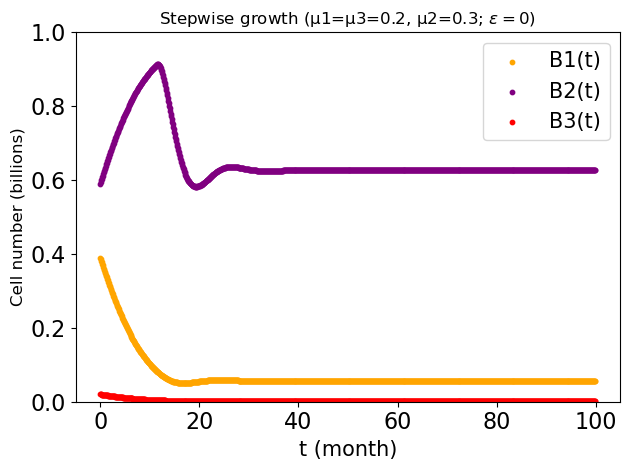

In [16]:
##ε=0; Fluxes1=0.1505791505791506; Fluxes2=0.3416988416988417; Fluxes3=0.007722007722007722
##ε=0.5; Fluxes1=0.1690085561382721; Fluxes2=0.31970783367194167; Fluxes3=0.011283610189786191
##ε=1; Fluxes1=0.18769883351007424; Fluxes2=0.2959866220735786; Fluxes3=0.016314544416347172
##ε=2; Fluxes1=0.22290105162916318; Fluxes2=0.24426119151800751; Fluxes3=0.03283775685282937
import matplotlib.pyplot as plt
plt.figure()
T_list=[0]
Fluxes1_list=[0.1506]
Fluxes2_list=[0.3417]
Fluxes3_list=[0.0077]
B1_vals=[0.39]
B2_vals=[0.59]
B3_vals=[0.02]

def B1(t):
    if(t<=0):
        return 0.39
    return B1_vals[int((t-1)/1)]*0.95+0.1*Fluxes1_list[-1]
def B2(t):
    if(t<=0):
        return 0.59
    return B2_vals[int((t-1)/1)]*0.95+0.1*Fluxes2_list[-1]
def B3(t):
    if(t<=0):
        return 0.02
    return B3_vals[int((t-1)/1)]*0.95+0.1*Fluxes3_list[-1]
A=0
for t in np.arange(1,1000,1):
    B1_t = B1(t)
    B2_t = B2(t)
    B3_t = B3(t)
    
#     B1_vals.append(B1_t)
#     B2_vals.append(B2_t)
#     B3_vals.append(B3_t)
    
    b1=0.5*0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))+0.2*B3_vals[-1])
    b2=0.5*0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))+0.2*B3_vals[-1])
    b3=0.5*0.2*B3_vals[-1]/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))+0.2*B3_vals[-1])
    
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    B3_vals.append(B3_t)
    
    model2.reactions.biomass3.upper_bound=b3
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
#     model2.reactions.DI3X.upper_bound=3*B3_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes3=sol.fluxes.loc['biomass3']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes1=sol.fluxes.loc['biomass1']
    
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)
    Fluxes3_list.append(Fluxes3)
    
    T=t/10
    T_list.append(T)
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0])           
# plt.scatter(T_list,Fluxes1_list,color='orange',s=10)
# plt.scatter(T_list,Fluxes2_list,color='purple',s=10)
# plt.scatter(T_list,Fluxes3_list,color='red',s=10)

plt.scatter(T_list,B1_vals,color='orange',s=10)
plt.scatter(T_list,B2_vals,color='purple',s=10)
plt.scatter(T_list,B3_vals,color='red',s=10)

plt.xlabel("t (month)",fontsize=15)

# plt.ylim(0,0.5)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=2$'')',fontsize=12)
# plt.ylabel("Biomass synthesis rate", fontsize=12)
# plt.legend(['b1(t)','b2(t)','b3(t)'],loc='upper right')

plt.ylim(0,1)
plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0$'')',fontsize=12)
plt.ylabel("Cell number (billions)",fontsize=12)
plt.legend(['B1(t)','B2(t)','B3(t)'],loc='upper right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()
# plt.show()
plt.savefig('Only regulation between biomass1 and biomass2(Obj=b1+b2+b3)',dpi=600)